In [62]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Functions.Preprocess import events_to_df_vert, events_to_df_vert1, scale_shift_feats, for_nn
from Functions.Models import cnn, lstm, lstm_big, train
from Functions.Compare import compareAB
analysis_path = "Analysis/RAVE/"

Wall time: 0 ns


In [63]:
%%time
max_ev = int(1e5)
n_constits = 50
sort = False
trunc = False

B_path = "Data/Rave/bb1/run_a0.txt"
S_path = "Data/Rave/dark1/run_a0.txt"

B = events_to_df_vert(B_path, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort, trunc=trunc)
S = events_to_df_vert(S_path, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort, trunc=trunc) 

# Shorten background datatframe to same length as signal
B = B[:len(S)]

print("Number of background jets = ", len(B))
print("Number of signal jets = ", len(S))

Number of background jets =  17636
Number of signal jets =  17636
Wall time: 14.5 s


In [65]:
B.head()

,Event,Jet,MET,jet_PT,jet_Eta,jet_Phi,track_PT,track_Eta,track_Phi,track_D0,track_DZ,vert_x,vert_y,vert_z,vert_num,label,n_vert
0,1,2,15.1328,156.818,-1.871830,-2.926510,"[1.17065, 0.876332, 1.85214, 0.599434, 4.32775...","[-1.50419, -1.97685, -1.44249, -2.13306, -1.57...","[-2.86724, -2.26749, 3.01586, 3.05339, 2.72489...","[0.0764505, 0.159428, 0.15643, 0.197969, 0.074...","[0.544986, 0.390373, 0.380305, 0.372999, 0.193...","[0.184897, 0.184897, 0.184897, 0.184897, 0.184...","[-0.00697759, -0.00697759, -0.00697759, -0.006...","[0.620411, 0.620411, 0.620411, 0.620411, 0.620...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",0,2
1,5,2,17.4014,149.622,-1.921400,-2.855120,"[2.12297, 4.93179, 7.94965, 1.40885, 4.99058, ...","[-2.18847, -1.76233, -1.88807, -2.1142, -1.804...","[-2.79936, -2.82143, -2.81583, -2.97638, -2.88...","[0.189917, 0.141345, 0.0484087, 0.167291, 0.19...","[-0.170323, 0.0337047, 0.0764409, -1.36524, -1...","[-0.219526, -0.219526, -0.219526, -0.219526, -...","[-0.0130544, -0.0130544, -0.0130544, -0.013054...","[-0.592155, -0.592155, -0.592155, -0.592155, -...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2
2,12,1,49.6518,149.656,1.975700,0.025053,"[2.32078, 0.454769, 4.53115, 0.801339, 11.0502...","[2.05281, 1.76787, 1.92837, 1.91314, 2.00859, ...","[0.0940663, -0.446225, 0.0629754, 0.00527343, ...","[0.404497, 0.34255, 0.202203, 0.316135, 0.0080...","[0.771595, 0.505086, 0.488345, 0.264341, 0.150...","[0.244733, 0.244733, 0.244733, 0.244733, 0.244...","[0.0149249, 0.0149249, 0.0149249, 0.0149249, 0...","[0.874337, 0.874337, 0.874337, 0.874337, 0.874...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2
3,14,2,34.6750,155.171,-0.512699,-2.371100,"[7.15904, 11.3941, 8.96627, 0.450471, 4.412, 1...","[-0.643432, -0.521836, -0.490664, -1.03263, -0...","[-2.3403, -2.32875, -2.32181, -2.27524, -2.283...","[0.00810551, 0.0231144, 0.00159164, 0.0047632,...","[0.0122501, 0.00470681, -0.0135219, 0.0943073,...","[0.00528053, 0.00528053, 0.00528053, 0.0052805...","[0.000257432, 0.000257432, 0.000257432, 0.0002...","[0.010683, 0.010683, 0.010683, 0.010683, 0.010...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2
4,17,2,19.6273,140.200,0.021071,2.735860,"[1.47676, 15.113, 4.76679, 1.84982, 1.50604, 4...","[0.4906, -0.167054, 0.325966, -0.00625859, 0.6...","[3.0003, 2.70695, 2.45933, 2.64192, 2.42979, 2...","[0.0165606, 0.0164295, 0.03824, 0.00889484, 0....","[-0.0539557, -0.0300757, -0.0334127, -0.057239...","[0.0766446, 0.0766446, 0.0766446, 0.0766446, 0...","[-0.0448916, -0.0448916, -0.0448916, -0.044891...","[-0.0377946, -0.0377946, -0.0377946, -0.037794...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,4


# Jet level vertexing

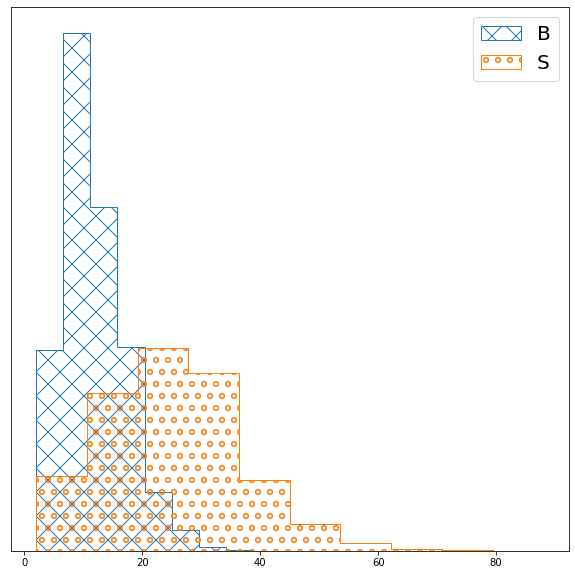

In [197]:
# Track multiplicity
B['mult'] = B.track_PT.map(lambda x: len(x))
S['mult'] = S.track_PT.map(lambda x: len(x))
plt.hist(B.mult, histtype="step",hatch="x", density=True, );
plt.hist(S.mult, histtype="step",hatch="o", density=True);
plt.legend(["B","S"],fontsize=20)
plt.yticks([])
plt.gcf().set_size_inches(10,10)

sig efficiency =  0.3150941256520753
bkg efficiency =  0.02574279882059424


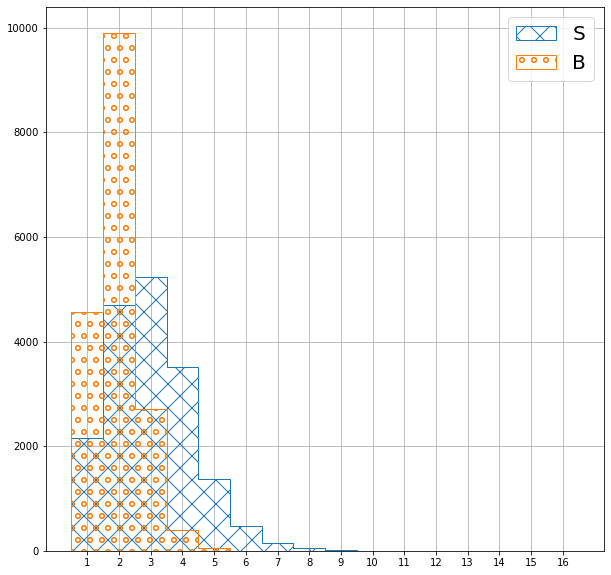

In [69]:
# Number of vertices per jet
max = 17
cutoff = 3
bins = np.arange(0.5,max+0.5,1)
ticks =np.arange(1,max);
S.n_vert.hist(bins=bins,histtype="step",hatch="x")
B.n_vert.hist(bins=bins,histtype="step",hatch="o")
plt.legend(["S","B"], fontsize=20)
plt.xticks(ticks)
plt.gcf().set_size_inches(10,10)
print("sig efficiency = ", S.n_vert[S.n_vert>cutoff].shape[0]/S.shape[0])
print("bkg efficiency = ", B.n_vert[B.n_vert>cutoff].shape[0]/B.shape[0])

## Sorted by Rave

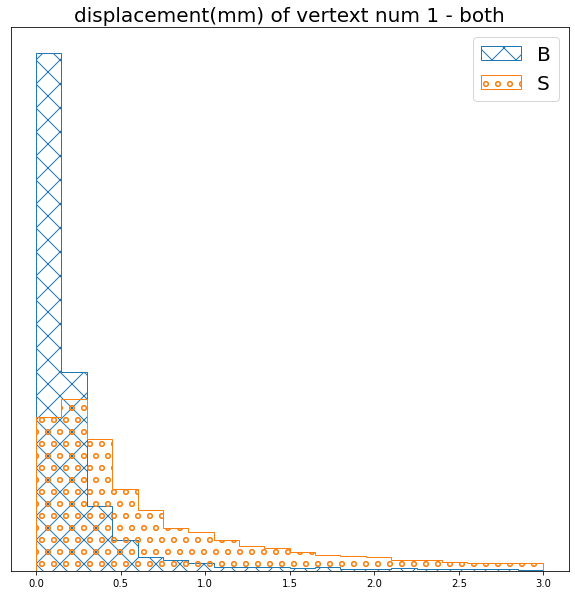

In [230]:
# Vertex displacement
n_vert = 1
range=[0,3]
boost = False
which = 'both'
bins=20
col_name = 'vert'+str(n_vert) + '_dist'
def vert(x, n_vert):
    u, ind = np.unique(x, return_index=True)
    u = u[np.argsort(ind)]
    return u[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.n_vert>=n_vert].vert_dist.apply(vert, args=(n_vert,))
B[col_name] = B[B.n_vert>=n_vert].vert_dist.apply(vert, args=(n_vert,))

if which == 'signal':
    plt.hist(B[B.n_vert>n_vert][col_name], histtype="step",hatch="x", density=True, range=range, bins=bins);
if which == 'background':    
    plt.hist(S[S.n_vert>n_vert][col_name], histtype="step",hatch="o", density=True, range=range, bins=bins);
if which == 'both':
    plt.hist(B[B.n_vert>n_vert][col_name], histtype="step",hatch="x", density=True, range=range, bins=bins);
    plt.hist(S[S.n_vert>n_vert][col_name], histtype="step",hatch="o", density=True, range=range, bins=bins);
    plt.legend(["B","S"], fontsize=20) 
plt.yticks([]);
plt.title("displacement(mm) of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(10,10)

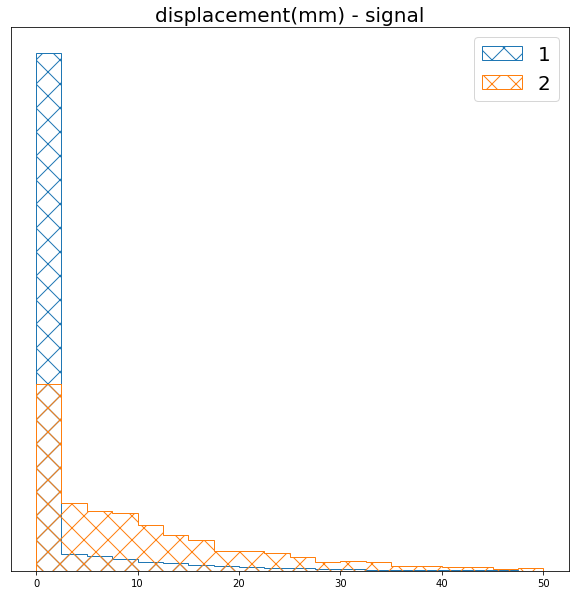

In [228]:
# Vertex displacement
n_vert1 = 1
n_vert2 = 2
range=[0,50]
boost = False
which = 'signal'
bins=20
col_name1 = 'vert'+str(n_vert1) + '_dist'
col_name2 = 'vert'+str(n_vert2) + '_dist'
def vert(x, n_vert):
    u, ind = np.unique(x, return_index=True)
    u = u[np.argsort(ind)]
    return u[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name1] = S[S.n_vert>=n_vert1].vert_dist.apply(vert, args=(n_vert1,))
B[col_name1] = B[B.n_vert>=n_vert1].vert_dist.apply(vert, args=(n_vert1,))
S[col_name2] = S[S.n_vert>=n_vert2].vert_dist.apply(vert, args=(n_vert2,))
B[col_name2] = B[B.n_vert>=n_vert2].vert_dist.apply(vert, args=(n_vert2,))

if which == 'signal':
    plt.hist(B[B.n_vert>n_vert1][col_name1], histtype="step",hatch="x", density=True, range=range, bins=bins);
    plt.hist(B[B.n_vert>n_vert2][col_name2], histtype="step",hatch="x", density=True, range=range, bins=bins);
if which == 'background':    
    plt.hist(S[S.n_vert>n_vert1][col_name1], histtype="step",hatch="o", density=True, range=range, bins=bins);
    plt.hist(S[S.n_vert>n_vert2][col_name2], histtype="step",hatch="o", density=True, range=range, bins=bins);

plt.legend([n_vert1, n_vert2], fontsize=20) 
plt.yticks([]);
plt.title("displacement(mm) - " + which, fontsize=20)
plt.gcf().set_size_inches(10,10)

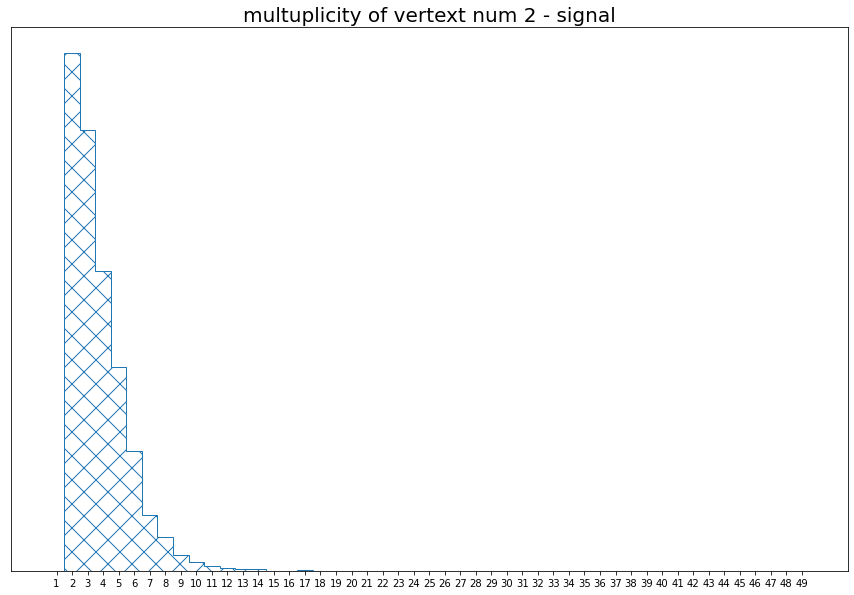

In [222]:
# Vertex multiplicity
n_vert = 2

range = None #[0,1]
bins = np.arange(0.5,50.5,1)
boost = False
which = 'signal'

col_name = 'vert' + str(n_vert) + '_mult'
def vert(x, n_vert):
    u, ind, c = np.unique(x, return_index=True, return_counts=True)
    c = c[np.argsort(ind)]
    return c[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.n_vert>=n_vert].vert_dist.apply(vert, args=(n_vert,))
B[col_name] = B[B.n_vert>=n_vert].vert_dist.apply(vert, args=(n_vert,))
#S[col_name] = S[col_name]/S.mult
#B[col_name] = B[col_name]/B.mult

if which == 'signal':
    plt.hist(B[B.n_vert>n_vert][col_name], histtype="step",hatch="x", density=True, range=range, bins=bins);
if which == 'background':    
    plt.hist(S[S.n_vert>n_vert][col_name], histtype="step",hatch="o", density=True, range=range, bins=bins);
if which == 'both':
    plt.hist(B[B.n_vert>n_vert][col_name], histtype="step",hatch="x", density=True, range=range, bins=bins);
    plt.hist(S[S.n_vert>n_vert][col_name], histtype="step",hatch="o", density=True, range=range, bins=bins);
    plt.legend(["B","S"], fontsize=20)
plt.yticks([]);
plt.xticks(np.arange(1,50));
plt.title("multuplicity of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(15,10)

# Event level vertexing

In [33]:
%%time
max_ev = int(1e5)
n_constits = 50
sort = False
trunc = False

B_path = "Data/bb1.txt"
S_path = "Data/dark1.txt"

B = events_to_df_vert1(B_path, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort, trunc=trunc)
S = events_to_df_vert1(S_path, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort, trunc=trunc) 

# Shorten background datatframe to same length as signal
S = S[:len(B)]
B = B[:len(S)]

B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)

def sort_vert(x):
    u, inv = np.unique(x, return_inverse=True)
    return inv    
B["n_vert_sorted"] = B.vert_dist.map(sort_vert)
S["n_vert_sorted"] = S.vert_dist.map(sort_vert)

print("Number of background jets = ", len(B))
print("Number of signal jets = ", len(S))

Number of background jets =  14602
Number of signal jets =  14602
Wall time: 14.1 s


In [37]:
S.head()

,Event,Jet,MET,jet_PT,jet_Eta,jet_Phi,n_vert,track_PT,track_Eta,track_Phi,track_D0,track_DZ,vert_x,vert_y,vert_z,vert_chisq,label,vert_mult
0,1,2,48.6481,147.683,-1.13738,-0.558606,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[5.07841, 4.21342, 1.26812, 3.69593, 0.940191,...","[-1.01974, -1.40371, -1.31655, -1.21479, -1.58...","[-0.251512, -0.0455938, 0.0676482, -0.328127, ...","[0.109045, 0.121689, 0.157434, 0.170327, 0.122...","[0.104684, 0.140017, 0.019347, 0.00130101, 0.2...","[0.000839803, 0.000839803, 0.000839803, 0.0008...","[-0.0119228, -0.0119228, -0.0119228, -0.011922...","[0.0735338, 0.0735338, 0.0735338, 0.0735338, 0...","[160.242, 160.242, 160.242, 160.242, 160.242, ...",1,6
1,9,2,3.1392,152.546,2.73244,-0.442162,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, ...","[3.57673, 8.54456, 0.56895, 1.94451, 1.77474, ...","[2.48976, 2.39591, 2.36809, 2.13958, 2.36763, ...","[-0.237709, -0.569121, -0.391348, -0.227099, -...","[0.1748, 0.0606478, 0.292931, 0.254684, 0.1870...","[0.469767, 1.08974, 1.79167, 2.6711, 3.01901, ...","[-0.0676728, -0.0676728, -0.0676728, -0.067672...","[0.0931671, 0.0931671, 0.0931671, 0.0931671, 0...","[0.118183, 0.118183, 0.118183, 0.118183, 0.118...","[108.47, 108.47, 108.47, 108.47, 108.47, 108.4...",1,5
2,20,1,17.1157,143.145,-1.25912,2.281940,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[2.21697, 3.25595, 3.65168, 3.67159, 1.99275, ...","[-1.1002, -1.2829, -1.16709, -1.3449, -1.00561...","[2.24243, 2.27706, 2.24652, 2.50441, 2.40707, ...","[0.0194354, 0.15786, 0.0441352, 0.0891086, 0.1...","[0.0770927, -0.0186948, -0.0476703, 0.0573872,...","[0.0562084, 0.0562084, 0.0562084, 0.0562084, 0...","[0.0223385, 0.0223385, 0.0223385, 0.0223385, 0...","[0.0313714, 0.0313714, 0.0313714, 0.0313714, 0...","[152.148, 152.148, 152.148, 152.148, 152.148, ...",1,4
3,21,1,44.3148,152.949,-1.79050,2.565780,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[9.32871, 21.599, 1.94525, 9.41612, 2.19606, 4...","[-1.7457, -1.76963, -1.77039, -1.79887, -1.510...","[2.66057, 2.39787, 2.80559, 2.43958, 2.57532, ...","[0.097879, 0.039443, 0.226967, 0.18596, 0.2358...","[-0.0314826, 0.106853, -0.150245, -0.290566, -...","[-0.0299541, -0.0299541, -0.0299541, -0.029954...","[0.0264298, 0.0264298, 0.0264298, 0.0264298, 0...","[-0.0364269, -0.0364269, -0.0364269, -0.036426...","[78.9811, 78.9811, 78.9811, 78.9811, 78.9811, ...",1,4
4,22,2,29.9841,143.197,1.74697,0.252596,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[2.33069, 2.40449, 1.52508, 1.77192, 0.221309,...","[1.64834, 1.70365, 1.99906, 2.15411, 2.00197, ...","[0.771029, 0.907212, 0.470544, 0.521016, 0.408...","[0.0513257, 0.111521, 0.0810947, 0.230021, 0.1...","[-0.0241479, -0.0225303, -0.0741434, -0.049017...","[-0.0262245, -0.0262245, -0.0262245, -0.026224...","[-0.0492964, -0.0492964, -0.0492964, -0.049296...","[0.029576, 0.029576, 0.029576, 0.029576, 0.029...","[184.025, 184.025, 184.025, 184.025, 184.025, ...",1,15


sig efficiency =  0.5158197507190796
bkg efficiency =  0.013217367483906315


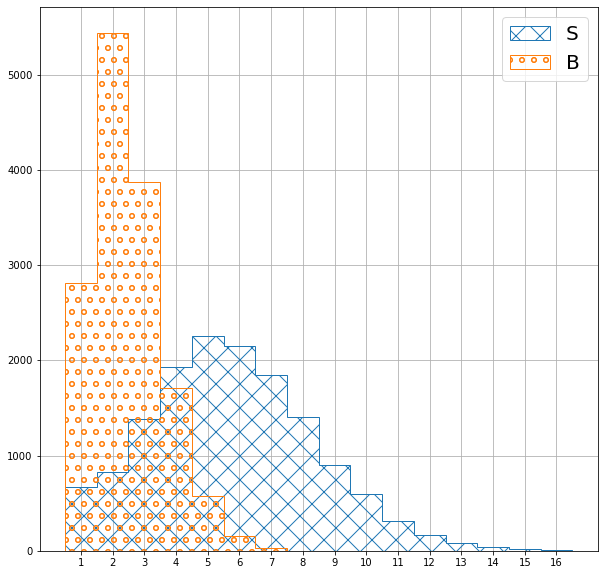

In [39]:
# Number of vertices per jet
max = 17
cutoff = 5
bins = np.arange(0.5,max+0.5,1)
ticks =np.arange(1,max);
S.vert_mult.hist(bins=bins,histtype="step",hatch="x")
B.vert_mult.hist(bins=bins,histtype="step",hatch="o")
plt.legend(["S","B"], fontsize=20)
plt.xticks(ticks)
plt.gcf().set_size_inches(10,10)
print("sig efficiency = ", S.vert_mult[S.vert_mult>cutoff].shape[0]/S.shape[0])
print("bkg efficiency = ", B.vert_mult[B.vert_mult>cutoff].shape[0]/B.shape[0])

## Sorted by Rave

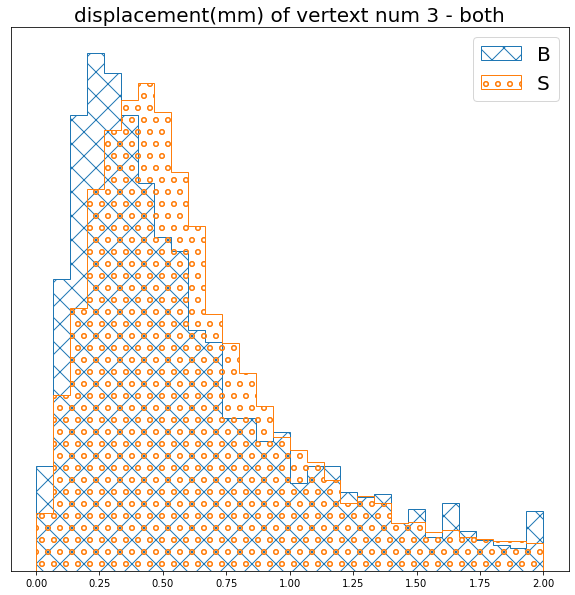

In [49]:
# Vertex displacement
n_vert = 3
x_range=[0,2]
boost = False
which = 'both'
bins=30
col_name = 'vert'+str(n_vert) + '_dist'
def n_vert_disp(x, n_vert):
    # Finds the diplacement of n_vert vertex.
    u, ind = np.unique(x, return_index=True)
    u = u[np.argsort(ind)]
    return u[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.vert_mult>=n_vert].vert_dist.apply(n_vert_disp, args=(n_vert,))
B[col_name] = B[B.vert_mult>=n_vert].vert_dist.apply(n_vert_disp, args=(n_vert,))

if which == 'signal':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
if which == 'background':    
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
if which == 'both':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
    plt.legend(["B","S"], fontsize=20) 
plt.yticks([]);
plt.title("displacement(mm) of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(10,10)

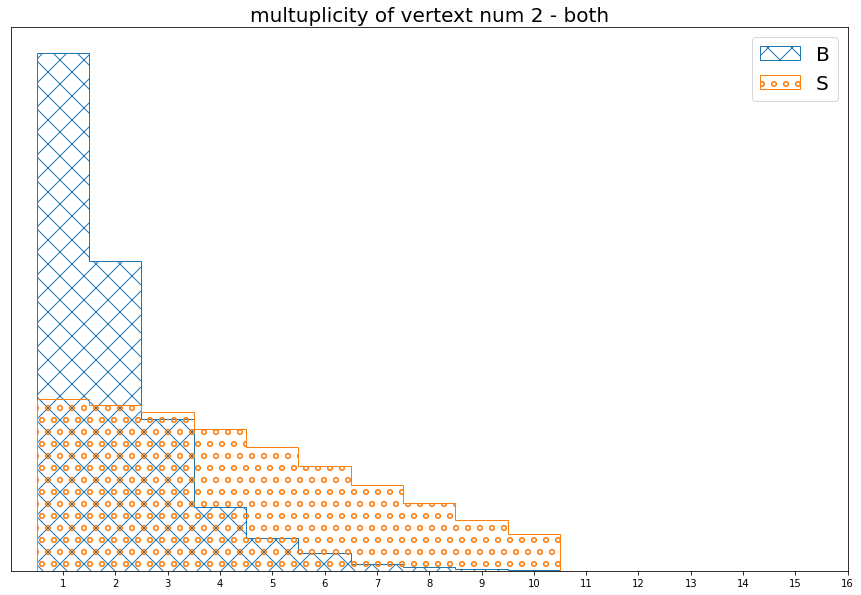

In [59]:
# Vertex multiplicity
n_vert = 2
x_max = 11

bins = np.arange(0.5,x_max+0.5,1)
np.arange(1,x_max)
boost = False
which = 'both'

col_name = 'vert' + str(n_vert) + '_mult'
def n_vert_mult(x, n_vert):
    u, ind, c = np.unique(x, return_index=True, return_counts=True)
    c = c[np.argsort(ind)]
    return c[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.vert_mult>=n_vert].vert_dist.apply(n_vert_mult, args=(n_vert,))
B[col_name] = B[B.vert_mult>=n_vert].vert_dist.apply(n_vert_mult, args=(n_vert,))
#S[col_name] = S[col_name]/S.mult
#B[col_name] = B[col_name]/B.mult

if which == 'signal':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
if which == 'background':    
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
if which == 'both':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
    plt.legend(["B","S"], fontsize=20)
plt.yticks([]);
plt.xticks(ticks);
plt.title("multuplicity of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(15,10)

In [26]:
max = 3
feat = "vert_dist"
all([all(B[feat].loc[i]==np.sort(B[feat].loc[i])[::-1]) for i in range(max)])

False

In [20]:
i = 1
B.vert_chisq.loc[i]==np.sort(B.vert_dist.loc[i])[::-1]

array([False, False, False, False, False, False, False, False])

In [21]:
B.vert_chisq.loc[i]

array([46.6023, 46.6023, 46.6023, 46.6023, 46.6023, 46.6023, 46.6023,
        2.9786])

In [ ]:
B.vert_chisq.loc[i]

In [32]:
a = np.array([1,2,2,5,-1])
u, inv = np.unique(a, return_inverse=True)
print(inv+1)

[2 3 3 4 1]


## Sorted by displacement

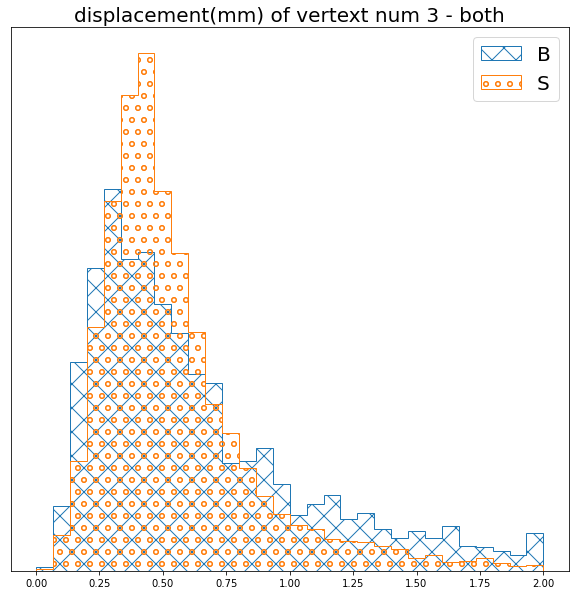

In [50]:
# Vertex displacement
n_vert = 3
x_range=[0,2]
boost = False
which = 'both'
bins=30
col_name = 'vert'+str(n_vert) + '_dist'
def n_vert_disp(x, n_vert):
    # Finds the diplacement of n_vert vertex.
    u, ind = np.unique(x, return_index=True)
    return u[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.vert_mult>=n_vert].vert_dist.apply(n_vert_disp, args=(n_vert,))
B[col_name] = B[B.vert_mult>=n_vert].vert_dist.apply(n_vert_disp, args=(n_vert,))

if which == 'signal':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
if which == 'background':    
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
if which == 'both':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
    plt.legend(["B","S"], fontsize=20) 
plt.yticks([]);
plt.title("displacement(mm) of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(10,10)

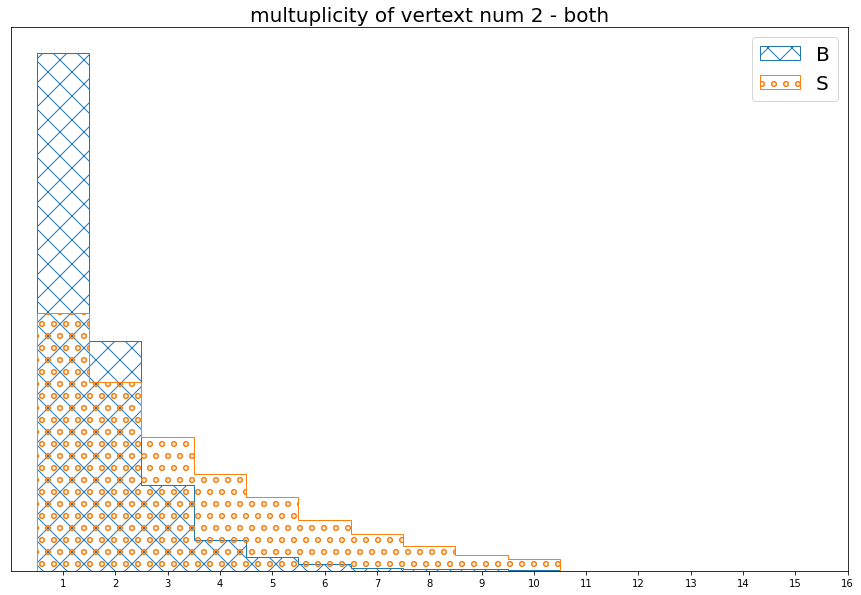

In [61]:
# Vertex multiplicity
n_vert = 2
x_max = 11

bins = np.arange(0.5,x_max + 0.5,1)
np.arange(1, x_max)
boost = False
which = 'both'

col_name = 'vert' + str(n_vert) + '_mult'
def n_vert_mult(x, n_vert):
    u, ind, c = np.unique(x, return_index=True, return_counts=True)
    return c[n_vert-1]

if boost:
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + (B.vert_z/(B.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + (S.vert_z/(S.track_Eta.map(np.cosh)))**2).map(np.sqrt) 
else:   
    B["vert_dist"] = (B.vert_x**2 + B.vert_y**2).map(np.sqrt)
    S["vert_dist"] = (S.vert_x**2 + S.vert_y**2).map(np.sqrt)    

S[col_name] = S[S.vert_mult>=n_vert].vert_dist.apply(n_vert_mult, args=(n_vert,))
B[col_name] = B[B.vert_mult>=n_vert].vert_dist.apply(n_vert_mult, args=(n_vert,))
#S[col_name] = S[col_name]/S.mult
#B[col_name] = B[col_name]/B.mult

if which == 'signal':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
if which == 'background':    
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
if which == 'both':
    plt.hist(B[B.vert_mult>n_vert][col_name], histtype="step",hatch="x", density=True, range=x_range, bins=bins);
    plt.hist(S[S.vert_mult>n_vert][col_name], histtype="step",hatch="o", density=True, range=x_range, bins=bins);
    plt.legend(["B","S"], fontsize=20)
plt.yticks([]);
plt.xticks(ticks);
plt.title("multuplicity of vertext num " + str(n_vert) +  " - " + which, fontsize=20)
plt.gcf().set_size_inches(15,10)